In [50]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

# Acquire, load, and preview the data.
data = pd.read_csv('https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv')

# Drill: fixing assumptions
# Judging from the diagnostic plots, your data has a problem with both heteroscedasticity 
# and multivariate non-normality. Use the cell(s) below to see what you can do to fix it.

data['TV_2'] = data['TV']**(1/4)
data['Sales_2'] = data['Sales']**(1/3)

# Fixed issue - see comments below

display(data.head())

# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['Sales_2'].values.reshape(-1, 1)
X = data[['TV_2','Radio','Newspaper']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nInterceapt: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


,Unnamed: 0,TV,Radio,Newspaper,Sales,TV_2,Sales_2
0,1,230.100,37.800,69.200,22.100,3.895,2.806
1,2,44.500,39.300,45.100,10.400,2.583,2.183
2,3,17.200,45.900,69.300,9.300,2.036,2.103
3,4,151.500,41.300,58.500,18.500,3.508,2.645
4,5,180.800,10.800,58.400,12.900,3.667,2.345



Coefficients: 
 [[3.72585930e-01 1.06091836e-02 8.04091869e-05]]

Interceapt: 
 [0.89129659]

R-squared:
0.9567540827295848


(array([ 2.,  9., 20., 47., 35., 29., 22., 17., 12.,  7.]),
 array([ 1.6 ,  4.14,  6.68,  9.22, 11.76, 14.3 , 16.84, 19.38, 21.92,
        24.46, 27.  ]),
 <a list of 10 Patch objects>)

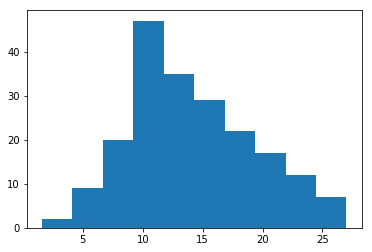

In [55]:
plt.hist(data['Sales'])

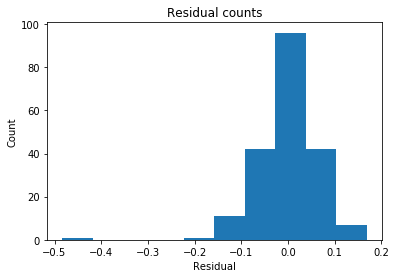

In [52]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['Sales_2']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

Changed the Sales and TV variables using square roots to create a much better linear dataset for the model

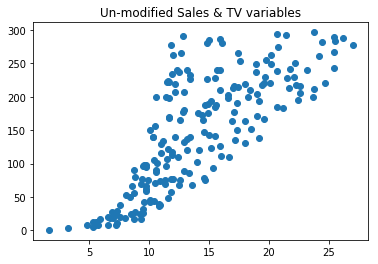

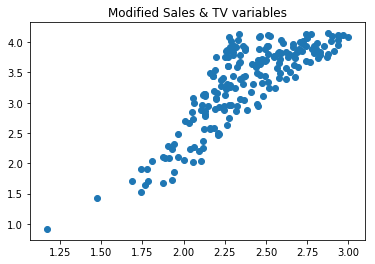

In [67]:
# plt.subplots(nrows=1, ncols=2)
plt.scatter(data['Sales'], data['TV'])
plt.title('Un-modified Sales & TV variables')
plt.show()
plt.scatter(data['Sales_2'], data['TV_2'])
plt.title('Modified Sales & TV variables')
plt.show()


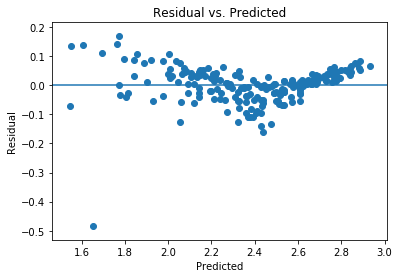

In [54]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()